In [14]:
from skimage import io
import numpy as np

In [15]:
# n = 2 ,2x2 bayer matrix
x = np.array([[0]])
consts = np.array([0,2,3,1])

a,b,c,d = (x*4 + const for const in consts)

up = np.concatenate((a,b),axis=1)
dn = np.concatenate((c,d),axis=1)
y = np.concatenate((up,dn),axis=0)
print(y, end='\n\n')


# n = 4 ,4x4 bayer matrix
x = y
consts = np.array([0,2,3,1])

a,b,c,d = (x*4 + const for const in consts)

up = np.concatenate((a,b),axis=1)
dn = np.concatenate((c,d),axis=1)
y = np.concatenate((up,dn),axis=0)
    
print(y, end='\n\n')

# n = 8 ,8x8 bayer matrix
x = y
consts = np.array([0,3,2,1])

a,b,c,d = (x*4 + const for const in consts.T)

up = np.concatenate((a.T,b.T),axis=1)
dn = np.concatenate((c.T,d.T),axis=1)
y = np.concatenate((up,dn),axis=0)
print(y)

[[0 2]
 [3 1]]

[[ 0  8  2 10]
 [12  4 14  6]
 [ 3 11  1  9]
 [15  7 13  5]]

[[ 0 48 12 60  3 51 15 63]
 [32 16 44 28 35 19 47 31]
 [ 8 56  4 52 11 59  7 55]
 [40 24 36 20 43 27 39 23]
 [ 2 50 14 62  1 49 13 61]
 [34 18 46 30 33 17 45 29]
 [10 58  6 54  9 57  5 53]
 [42 26 38 22 41 25 37 21]]


In [16]:
def create_bayer_matrix(n):
    x = np.array([[0]])
    i = 0
    while n!=1:
        if i%2 == 1 or i == 0:
            consts = np.array([0,2,3,1])
            a,b,c,d = (x*4 + const for const in consts)
        else:
            # transpose matrix
            consts = np.array([0,3,2,1])
            a,b,c,d = (x*4 + const for const in consts.T)
            a,b,c,d = a.T, b.T ,c.T ,d.T

        up = np.concatenate((a,b),axis=1)
        dn = np.concatenate((c,d),axis=1)
        y = np.concatenate((up,dn),axis=0)
        x = y

        n=n/2
        i+=1
        
    return x

m2 = create_bayer_matrix(2)
print('2x2 bayer_matrix:\n',m2)

m4 = create_bayer_matrix(4)
print('\n4x4 bayer_matrix:\n',m4)

m8 = create_bayer_matrix(8)
print('\n8x8 bayer_matrix:\n',m8)

# m16 = create_bayer_matrix(16)
# print('\n16x16 bayer_matrix:\n',m16)

2x2 bayer_matrix:
 [[0 2]
 [3 1]]

4x4 bayer_matrix:
 [[ 0  8  2 10]
 [12  4 14  6]
 [ 3 11  1  9]
 [15  7 13  5]]

8x8 bayer_matrix:
 [[ 0 48 12 60  3 51 15 63]
 [32 16 44 28 35 19 47 31]
 [ 8 56  4 52 11 59  7 55]
 [40 24 36 20 43 27 39 23]
 [ 2 50 14 62  1 49 13 61]
 [34 18 46 30 33 17 45 29]
 [10 58  6 54  9 57  5 53]
 [42 26 38 22 41 25 37 21]]


(331, 384, 3)


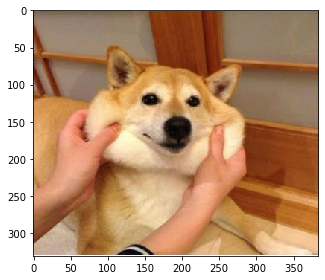

In [17]:
img=io.imread('dog.jpg')
io.imshow(img)

(w,h,c) = img.shape
print((w,h,c))

In [18]:
n = 2
bayer_matrix = create_bayer_matrix(n)
color_scale = int(256/(n*n))

filter_matrix = np.array([[color_scale*x for x in row] for row in bayer_matrix])

print(filter_matrix)

[[  0 128]
 [192  64]]


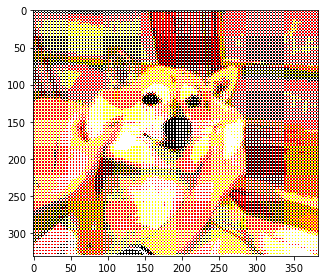

In [19]:
for x in range(w):
    for y in range(h):
        i = x % n
        j = y % n
        for k in range(c):
            if img[x][y][k] > filter_matrix[i][j]:
                img[x][y][k]=255
            else:
                img[x][y][k]=0
        

io.imshow(img)